Data Load

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv('../data/Breast_cancer_dataset.csv')

X = data.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = data['diagnosis'].map({'M': 1, 'B': 0})

### 1) a.

In [2]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) # random_state for reproducibility

knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = []
nb = GaussianNB()
nb_scores = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, y_pred))

for train_index, test_index in folds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    nb_scores.append(accuracy_score(y_test, y_pred))

print(f"kNN accuracies: {knn_scores}")
print(f"kNN mean: {np.mean(knn_scores):.4f} ± {np.std(knn_scores):.4f}")
print(f"\nNaïve Bayes accuracies: {nb_scores}")
print(f"NB mean: {np.mean(nb_scores):.4f} ± {np.std(nb_scores):.4f}")

kNN accuracies: [0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9646017699115044]
kNN mean: 0.9315 ± 0.0186

Naïve Bayes accuracies: [0.9210526315789473, 0.9649122807017544, 0.9122807017543859, 0.9385964912280702, 0.9557522123893806]
NB mean: 0.9385 ± 0.0199


- Both models achieved high performance (above 93% mean accuracy).
- Naive Bayes shows a slightly higher mean accuracy (0.9385 vs. 0.9315), indicating better average performance on this dataset.
- However, kNN exhibits a smaller standard deviation (0.0186 < 0.0199), meaning it is more stable across folds.
- This greater stability likely arises because kNN is an instance-based method, less affected by small changes in the data distribution.
- In contrast, Naive Bayes relies on estimated Gaussian distributions, which may fluctuate slightly when the data deviates from this assumption.

### 1) b.

In [3]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled_scores = []

for train_index, test_index in folds.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_scaled.fit(X_train, y_train)
    y_pred = knn_scaled.predict(X_test)
    knn_scaled_scores.append(accuracy_score(y_test, y_pred))

print(f"Scaled kNN accuracies: {knn_scaled_scores}")
print(f"Scaled kNN mean: {np.mean(knn_scaled_scores):.4f} ± {np.std(knn_scaled_scores):.4f}")


Scaled kNN accuracies: [0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9823008849557522]
Scaled kNN mean: 0.9701 ± 0.0131


- After normalization, the model’s mean accuracy increased from 0.9315 to 0.9701, while the standard deviation decreased from 0.0186 to 0.0131, indicating both higher accuracy and improved stability across folds.

- This behavior is expected because kNN is a distance-based algorithm, and normalization ensures that all features contribute equally to the distance calculations. Without normalization, features with larger scales can dominate the distance metric, leading to suboptimal neighbor selection and reduced model performance.

### 1) c.

In [4]:
nb_scaled = GaussianNB()
nb_scaled_scores = []

for train_index, test_index in folds.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nb_scaled.fit(X_train, y_train)
    y_pred = nb_scaled.predict(X_test)
    nb_scaled_scores.append(accuracy_score(y_test, y_pred))

# Using scipy, determine whether the scaled 𝑘𝑁𝑁 model is statistically
# superior to Naïve Bayes (also scaled) when it comes to accuracy, and justify your
# result.
t_stat, p_value = stats.ttest_rel(knn_scaled_scores, nb_scaled_scores)
alpha = 0.05
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    if np.mean(knn_scaled_scores) > np.mean(nb_scaled_scores):
        print("Reject the null hypothesis: kNN is statistically superior to Naïve Bayes.")
    else:
        print("Reject the null hypothesis: Naïve Bayes is statistically superior to kNN.")
else:
    print("Fail to reject the null hypothesis: No statistical superiority detected.")


T-statistic: 8.913735086059038, P-value: 0.0008756365402909262
Reject the null hypothesis: kNN is statistically superior to Naïve Bayes.


- The paired t-test confirmed that the difference in accuracy between scaled kNN and scaled Naive Bayes is statistically significant (p < 0.05), therefore we can reject the null hypothesis that both models perform equally well.
- Consequently, the scaled kNN classifier outperforms Naive Bayes on this dataset, benefiting from normalization and its ability to model non-linear decision boundaries.

### 2) a.

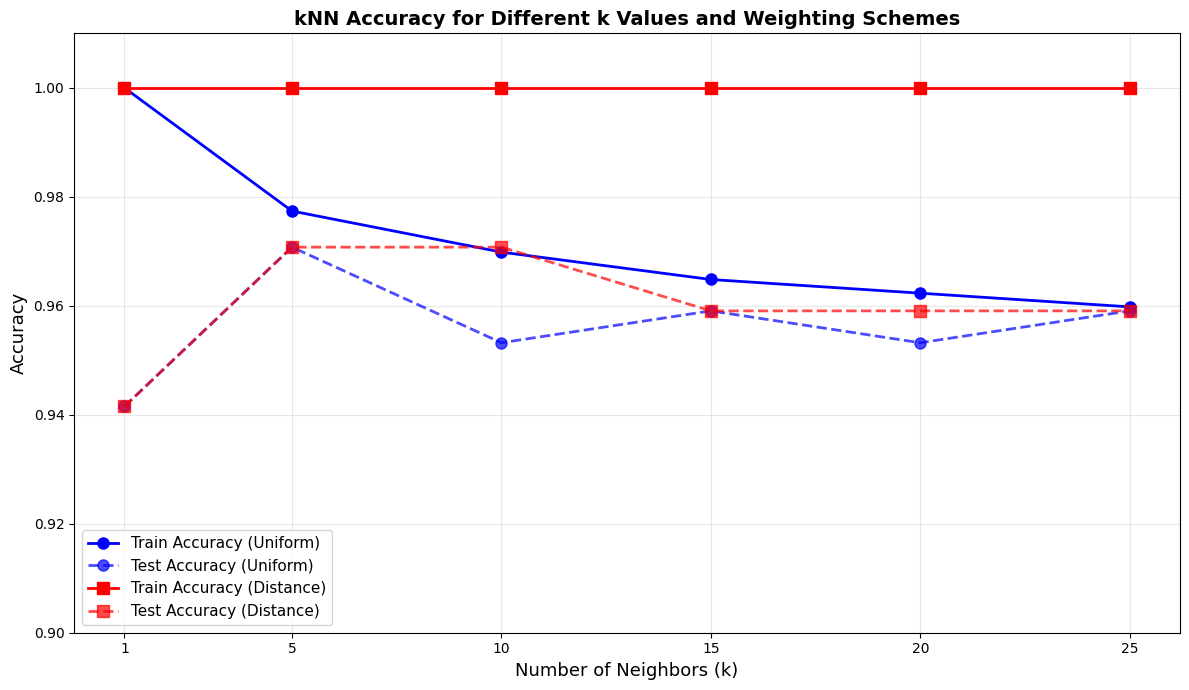


Numerical Results:
k    Train Uniform   Test Uniform    Train Distance  Test Distance  
1    1.0000          0.9415          1.0000          0.9415         
5    0.9774          0.9708          1.0000          0.9708         
10   0.9698          0.9532          1.0000          0.9708         
15   0.9648          0.9591          1.0000          0.9591         
20   0.9623          0.9532          1.0000          0.9591         
25   0.9598          0.9591          1.0000          0.9591         


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

k_values = [1, 5, 10, 15, 20, 25]
train_uniform_accuracies = []
test_uniform_accuracies = []
train_distance_accuracies = []
test_distance_accuracies = []

for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn_uniform.fit(X_train, y_train)
    train_uniform_accuracies.append(knn_uniform.score(X_train, y_train))
    test_uniform_accuracies.append(knn_uniform.score(X_test, y_test))

    # Distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn_distance.fit(X_train, y_train)
    train_distance_accuracies.append(knn_distance.score(X_train, y_train))
    test_distance_accuracies.append(knn_distance.score(X_test, y_test))

plt.figure(figsize=(12, 7))
plt.plot(
    k_values,
    train_uniform_accuracies,
    marker="o",
    linestyle="-",
    label="Train Accuracy (Uniform)",
    color="blue",
    linewidth=2,
    markersize=8,
)
plt.plot(
    k_values,
    test_uniform_accuracies,
    marker="o",
    linestyle="--",
    label="Test Accuracy (Uniform)",
    color="blue",
    linewidth=2,
    markersize=8,
    alpha=0.7,
)
plt.plot(
    k_values,
    train_distance_accuracies,
    marker="s",
    linestyle="-",
    label="Train Accuracy (Distance)",
    color="red",
    linewidth=2,
    markersize=8,
)
plt.plot(
    k_values,
    test_distance_accuracies,
    marker="s",
    linestyle="--",
    label="Test Accuracy (Distance)",
    color="red",
    linewidth=2,
    markersize=8,
    alpha=0.7,
)

plt.xlabel("Number of Neighbors (k)", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title(
    "kNN Accuracy for Different k Values and Weighting Schemes",
    fontsize=14,
    fontweight="bold",
)
plt.xticks(k_values)
plt.ylim(0.90, 1.01)  
plt.legend(fontsize=11, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


print("\nNumerical Results:")
print("=" * 80)
print(
    f"{'k':<4} {'Train Uniform':<15} {'Test Uniform':<15} {'Train Distance':<15} {'Test Distance':<15}"
)
print("=" * 80)
for i, k in enumerate(k_values):
    print(
        f"{k:<4} {train_uniform_accuracies[i]:<15.4f} {test_uniform_accuracies[i]:<15.4f} "
        f"{train_distance_accuracies[i]:<15.4f} {test_distance_accuracies[i]:<15.4f}"
    )

### 2) b. 
Increasing the number of neighbors (k) in the kNN model strongly affects how well it generalizes to new data. 

- For small k values (such as k = 1), both uniform and distance-weighted models reach perfect training accuracy (1.0000) but lower test accuracy (0.9415). This means the model overfits the training data—it learns noise and small details instead of real patterns.

- When k increases to medium values (k = 5–15), the model generalizes better. Test accuracy improves to 0.9708 for k = 5, and the difference between training and test accuracy becomes very small. Considering more neighbors smooths the decision boundary, which slightly increases bias but greatly reduces variance, resulting in more stable and reliable predictions.

- For large k values (k ≥ 20), the model begins to underfit. Training accuracy continues to drop (around 0.96), and test accuracy stays around 0.95–0.96. This happens because the model includes too many neighbors, even from other classes, making its decisions too simple and less precise.

Distance weighting gives similar or slightly better results than uniform weighting and makes the model less sensitive to the choice of k, since closer neighbors have more influence. The best value for this dataset is k = 5, which gives the highest test accuracy (0.9708) with good generalization and low computational cost.

In summary, small k values cause overfitting, large k values cause underfitting, and medium k values provide the best balance. Therefore, k = 5 is the recommended choice for this dataset.


### 3)

